Name:- **Yusuf-Harun-Shaikh**


**Predicition using Decision Tree Algorithum**


In [156]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

np.random.seed(0)
import random


import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras import backend as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.models import model_from_json


from keras.utils.vis_utils import plot_model


from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as sp
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [157]:
iris_data= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [158]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

In [159]:
iris_data.columns = columns
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [160]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,Species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [161]:
iris_data.shape

(149, 5)

In [162]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [163]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [164]:
iris_data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  Species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.2           2.7          3.9           1.4          Iris-versicolor    1
              3.4          1.4           0.2          Iris-setosa        1
              3.5          1.5           0.2          Iris-setosa        1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 146, dtype: int64

In [165]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [166]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species          object
dtype: object

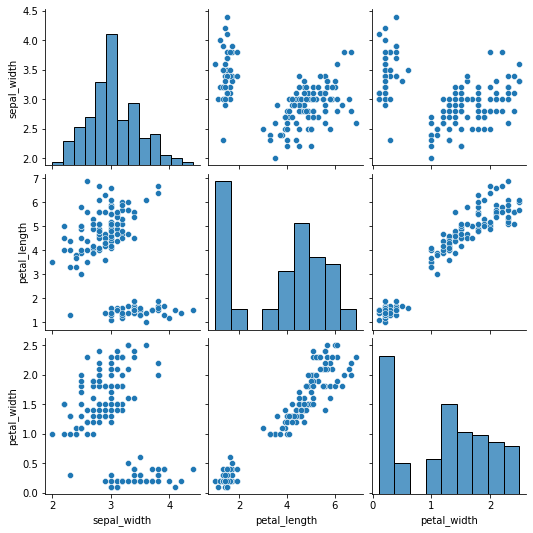

In [167]:
sns.pairplot(iris_data.iloc[:,1:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facaee66b90>,
      dtype=object)

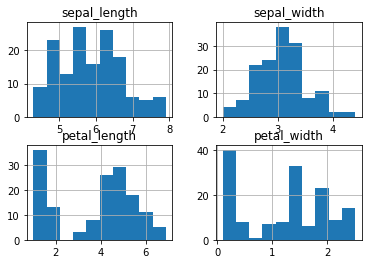

In [168]:
iris_data.hist()

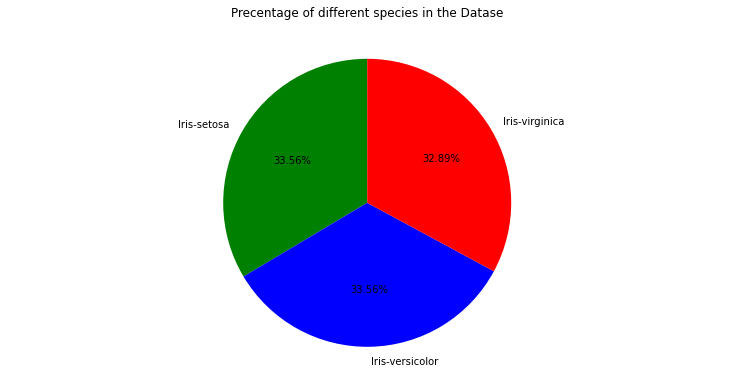

In [169]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors=['green','blue','red']
sp=iris_data['Species'].unique()
ct=iris_data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Precentage of different species in the Datase')
plt.show()

In [170]:
iris_data.skew()

sepal_length    0.303098
sepal_width     0.350101
petal_length   -0.289459
petal_width    -0.117808
dtype: float64

In [171]:
dupes = iris_data.duplicated()
dupes

0      False
1      False
2      False
3      False
4      False
       ...  
144    False
145    False
146    False
147    False
148    False
Length: 149, dtype: bool

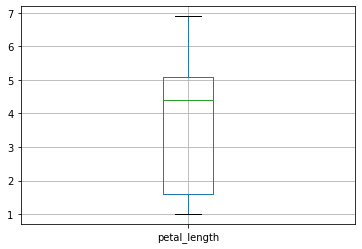

In [172]:
iris_data.boxplot(column='petal_length')

In [173]:
iris_data.quantile(0.75)-iris_data.quantile(0.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

Text(0.5, 1.0, 'Species vs Petal Length')

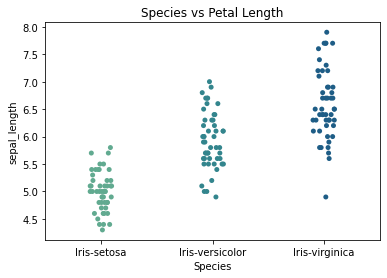

In [174]:
sns.stripplot(x='Species', y='sepal_length', data=iris_data, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

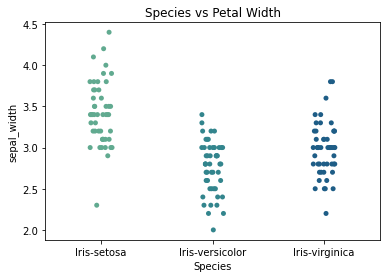

In [175]:
sns.stripplot(x='Species', y='sepal_width', data=iris_data, palette='crest')
plt.title('Species vs Petal Width')

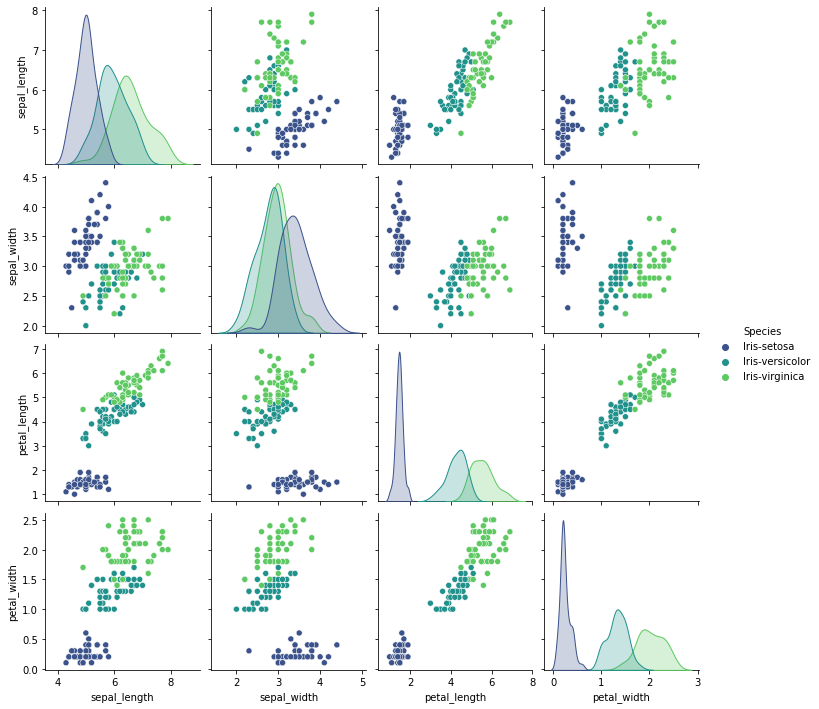

In [176]:
sns.pairplot(iris_data, hue = 'Species', palette='viridis')
plt.show()

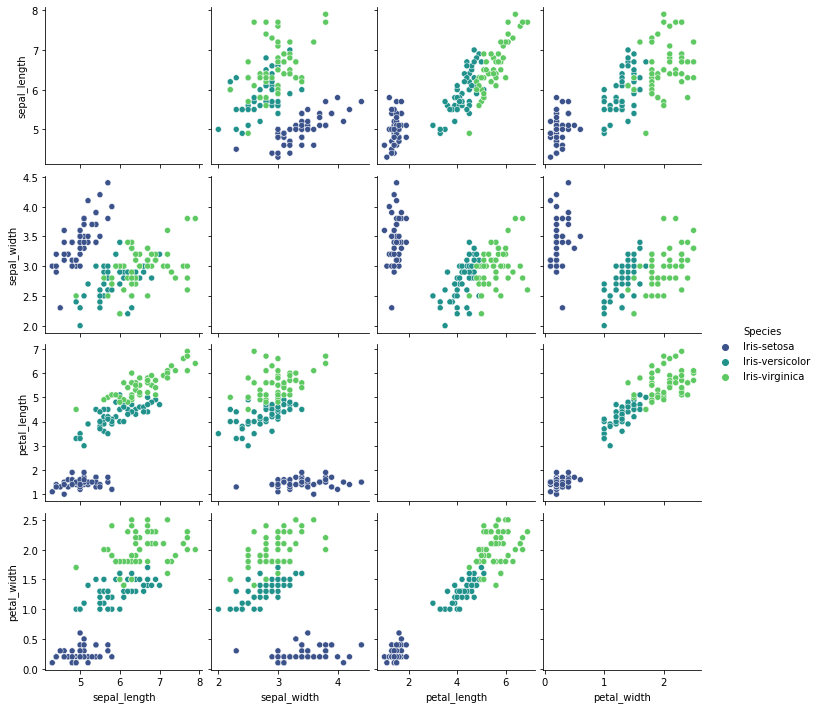

In [177]:
sns.pairplot(iris_data, hue= 'Species', palette='viridis', diag_kind='reg')

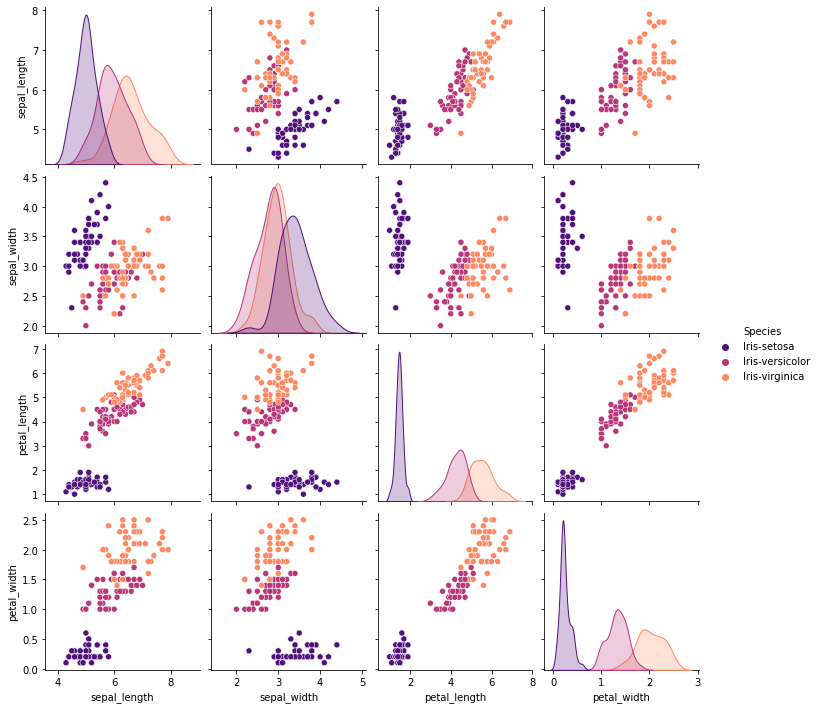

In [178]:
sns.pairplot(iris_data, hue ='Species', palette='magma', diag_kind='kde')

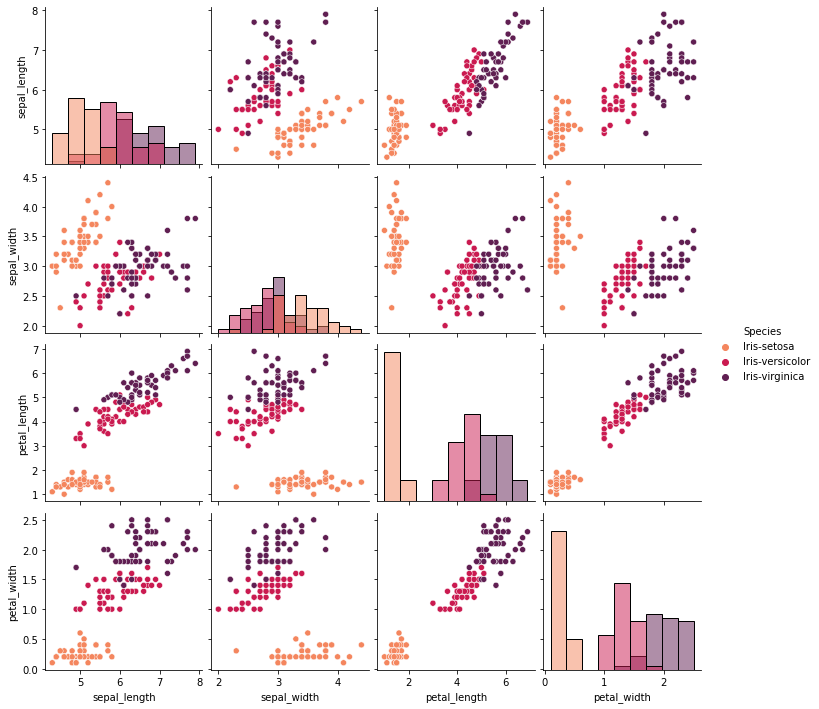

In [179]:
sns.pairplot(iris_data, hue='Species', palette='rocket_r', diag_kind='hist')

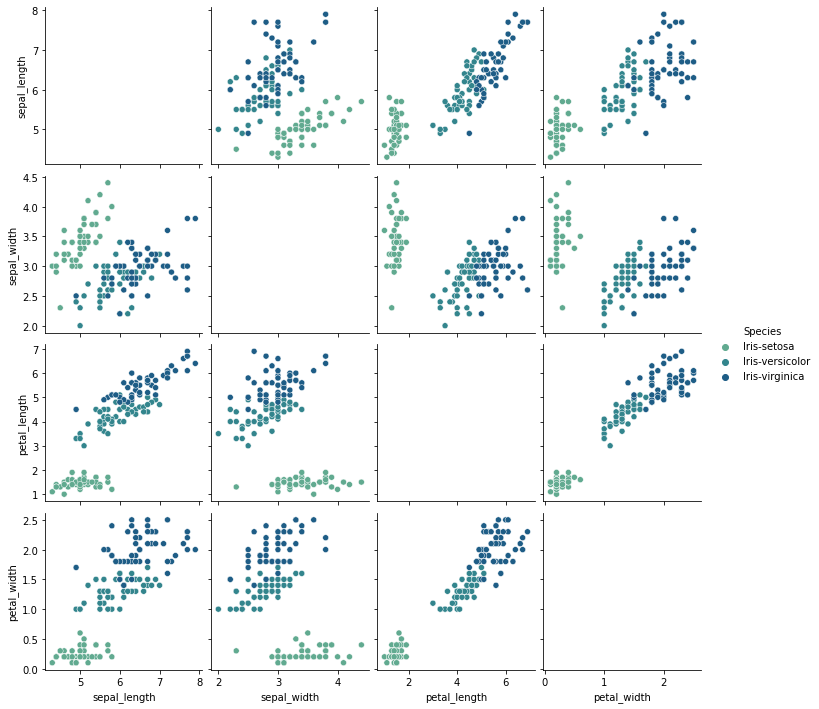

In [180]:
sns.pairplot(iris_data , hue='Species', palette='crest', diag_kind='scatter')

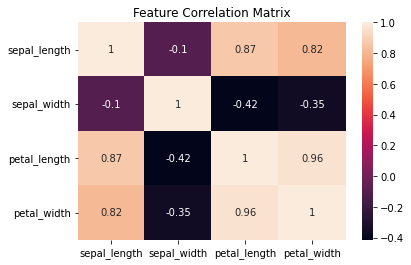

In [181]:
matrix = iris_data.corr()
corMat = sns.heatmap(matrix, annot=True)
corMat.set_title("Feature Correlation Matrix")
plt.show()

In [182]:
x = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=1)

In [184]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [185]:
print(model.score(x_test,y_test))

0.9555555555555556


In [186]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa']


In [187]:
sc = DecisionTreeClassifier(criterion='entropy', random_state=20)
sc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred1 = sc.predict(x_test)
predicated1=y_pred1
actual=y_test
score_lr=accuracy_score(y_test,y_pred1)
print("Accuracy is:", score_lr)
print("Recall:{}".format(metrics.recall_score(y_test,y_pred1,average='macro')))
print("Precision:{}".format(metrics.precision_score(y_test, y_pred1,average='macro')))
results=confusion_matrix(actual,predicated1)
print('confusion matrix:\n', results)

Accuracy is: 0.9555555555555556
Recall:0.9535256410256411
Precision:0.9535256410256411
confusion matrix:
 [[16  0  0]
 [ 0 15  1]
 [ 0  1 12]]


In [190]:
print('Classification Report:')
print(metrics.classification_report(y_test,y_pred1))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [191]:
feature_names = iris_data.columns[:4]
target_names = iris_data['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

<function matplotlib.pyplot.show>

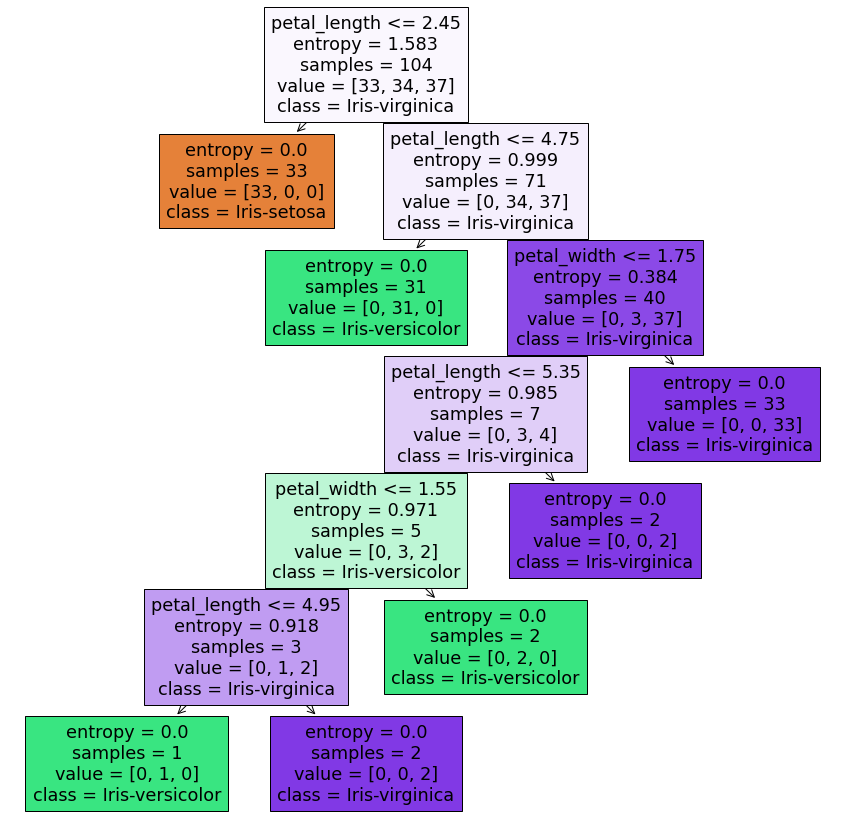

In [192]:
features = iris_data.columns[:-1]
classes = iris_data['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(sc, feature_names = features, class_names = classes, filled=True)
plt.show